# Dataset (_Artificial_)

Artificial data modelling rebound X-ray signal and Rock density.

Available data $\rightarrow$
Experiment generated data variety of rock samples and how x-ray signals rebound from them.

>**Goal**: Predict **`Rock density`** based on **rebound `X-ray signal`** in order to decide **cutting tool** to use for boring a tunnel.

### Features $\rightarrow$
1. **`X-ray signal strength`** (nHz/Nano Hetrz)
Target variable $\rightarrow$
2. **`Rock density`** (kg/m<sup>3</sup>)

Will create a **model** that can explain the dataset and **generalize** for future real-world use.

# Loading & Probing the data

In [2]:
# for data manipulation & visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load into dataframe

filepath = r"D:\ML\Machine Learning_Practical\Scikit Learn\Decision Trees\Data\rock_density_xray.csv"
df = pd.read_csv(filepath)

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [6]:
# rename columns for easier access
df = df.rename(columns={"Rebound Signal Strength nHz":"signal",
                  "Rock Density kg/m3":"density"})

In [8]:
# after renaming cols
df.head()

,signal,density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


## Visualizing the data

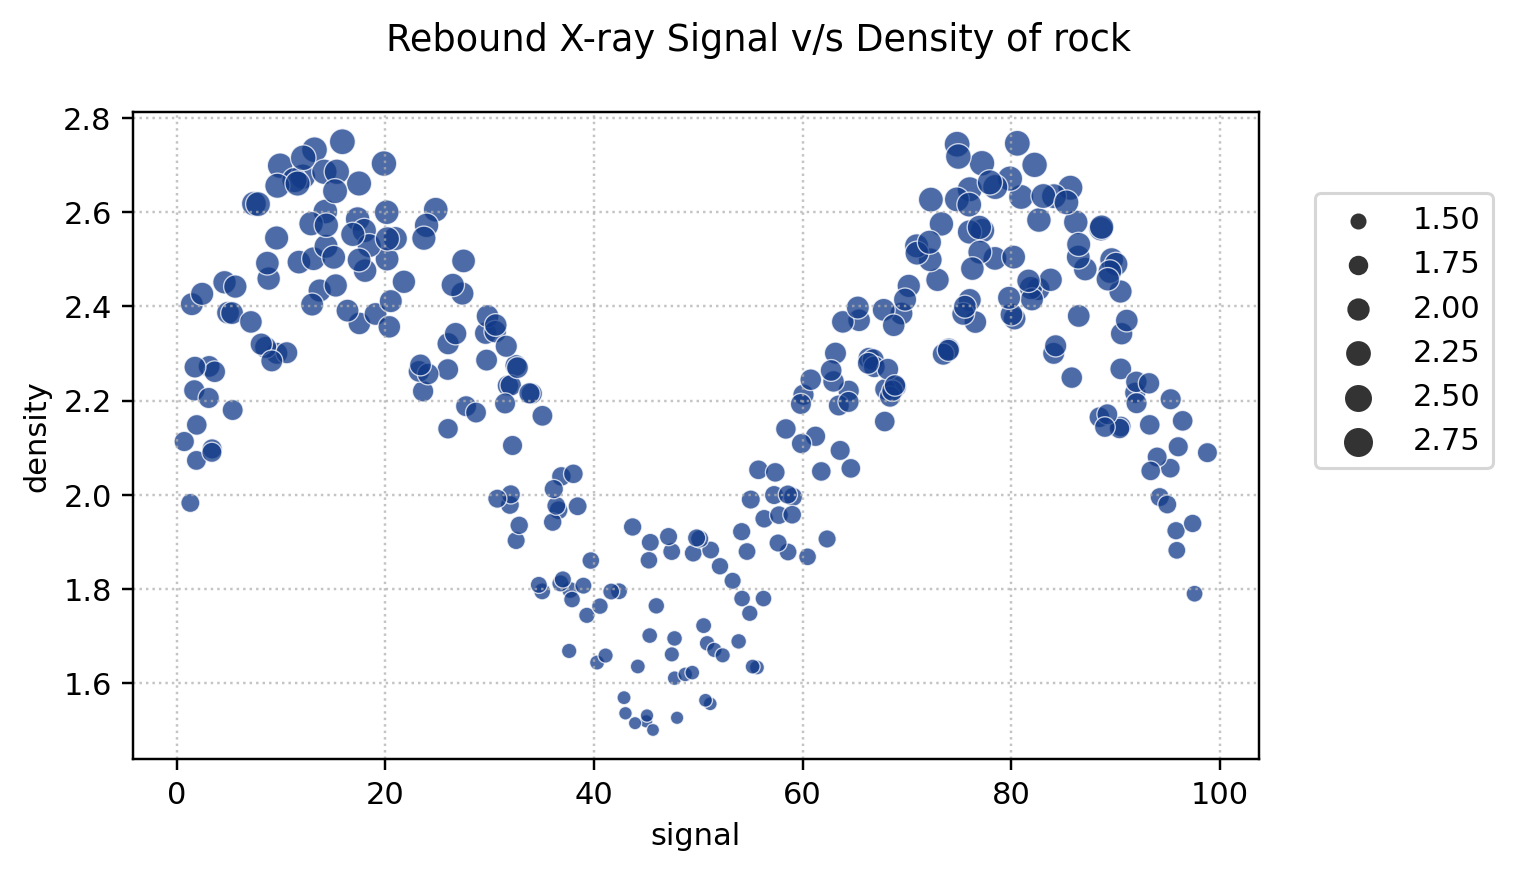

In [21]:
# scatterplot

fig, ax = plt.subplots(figsize=(7,4), dpi=220)

sns.scatterplot(x="signal", y="density", data=df, ax=ax,
               s=15, size="density", color="#113988", alpha=0.75)

ax.grid(linestyle=":", linewidth=0.8, alpha=0.75)
ax.legend(loc=(1.05, 0.45))

fig.suptitle("Rebound X-ray Signal v/s Density of rock")
fig.tight_layout();

# Plan of Action
Will try out **different ML models**  and **evaluate** performance of each.\
Will conclude which model best explains the data and is likely to generalize well.

##### NOTE:
>_Some datasets like this one may require complex model to explain.\
As the **sinusoidal pattern** underlying the data reveals, models such as `linear regression` or `polynomial regression` may be too simple for modelling such a dataset.\
Will need something more complex such as a `Random Forest decision tree`._

# Preparing the data for training & testing
>_Since only **single feature** dataset, hence **feature scaling** will **not** be required in this case. The scale of data of target variable & input features do not vary over large magnitudes_.

##### NOTE
_`scikit-learn` expects inputs to be **2D Numpy arrays**.\
Hence need to **reshape** data as $\rightarrow$_

```python
array.reshape(-1, 1) -> for single feature
array.reshape(1, -1) -> for single example
array.reshape(m,n) -> for m examples & n features
```

In [26]:
# separating the feature

# comvert input featur into 2D numpy array of shape (m,1)
# i.e m Rows & 1 Col (Column vector) 
X = np.array(df["signal"]).reshape(-1,1)

# convert target label into 2D numy array of shape (m,1)
# i.e. m Rows & 1 Col (Column vector)
y = np.array(df["density"]).reshape(-1,1)

In [29]:
print(f"First 5 examples (feature):\n{X[0:5]}")
print(f"\n\nFirst 5 examples (target):\n{y[0:5]}")

First 5 examples (feature):
[[72.94512436]
 [14.2298772 ]
 [36.59733361]
 [ 9.57889939]
 [21.76589708]]


First 5 examples (target):
[[2.45654788]
 [2.60171932]
 [1.96700389]
 [2.30043858]
 [2.45237439]]


In [30]:
# for creating training set & test set

from sklearn.model_selection import train_test_split

In [32]:
# Training set = 90% data; Test set = 10% data

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=0)

## Try 1: Linear Regression model

In [33]:
# linear regression model

from sklearn.linear_model import LinearRegression

In [34]:
# instantiate model
lr_model = LinearRegression()

In [35]:
# train the model
lr_model.fit(X=X_train, y=y_train)

LinearRegression()

In [36]:
# get predictions on test set
lr_predictions = lr_model.predict(X=X_test)

In [37]:
print(f"First 5 predictions off Test set:\n{lr_predictions[0:5]}")
print(f"\n\nFirst 5 actual target values in Test set:\n{y_test[0:5]}")

First 5 predictions off Test set:
[[2.24108167]
 [2.20385041]
 [2.23353518]
 [2.20974572]
 [2.23066268]]


First 5 actual target values in Test set:
[[2.54371962]
 [2.70434078]
 [2.23167113]
 [2.26671265]
 [2.01188113]]


In [39]:
# evaluate performance

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
# get error scores

# mean squared error
mse = mean_squared_error(y_true=y_test, y_pred=lr_predictions)
# mean absolute error
mae = mean_absolute_error(y_true=y_test, y_pred=lr_predictions)
# root mean squared error
rmse = np.sqrt(mse)

In [46]:
print(f"Actual value of target label ('density') varies between:\n{y.min()} and {y.max()} with Mean of {y.mean()}\n")

print(f"Mean Absolute Error = {round(mae, ndigits=4)}")
print(f"Root Mean Squared Error = {round(rmse, ndigits=4)}")

Actual value of target label ('density') varies between:
1.5 and 2.75 with Mean of 2.225062949323796

Mean Absolute Error = 0.2089
Root Mean Squared Error = 0.2666


#### Observation
1. **`density`** ranges b/w `0.5 & 2.75`, and both **`MAE & RMSE`** are ~`0.21-0.27` $\rightarrow 9\%-12\% \;error$
    - seems like Linear regression model performs well
    
But, need to plot and visualize for clarity.

In [ ]:
# visualizing linear regression model performance

